# Dlouhá válcová skořepina

## Základní vztahy

Význam jednotlivých složek výsledných momentů, sil a vnějšího zatížení působící na element skořepiny je na následijícím obrázku.

<img src="skorepina_element.png" alt="element skorepiny" title="element skorepiny" width="500"/>

Obecné řešení pro dlouhou skořepinu má tvar

\begin{equation}
  u=\tilde{u}+u_{p},
\end{equation}

kde $\tilde{u}$ je homogenní řešení

\begin{equation}
  \tilde{u}=\mathrm{e}^{-\beta z}\left(C_{1}\sin\beta z+C_{2}\cos\beta z\right)
\end{equation}

a $u_{p}$ je partikulární řešení

\begin{equation}
  u_{p}=\frac{r^{2}}{Eh}\left[p-\frac{\nu}{r}\left(C_{0}-\int p_{z}\mathrm{d}z\right)\right],
\end{equation}

kde $r$ je poloměr skořepiny a $p$ a $p_{z}$ jsou polynomy maximálně třetího stupně a 

\begin{equation}
  \beta=\sqrt[4]{\frac{3\left(1-\nu^{2}\right)}{r^{2}h^{2}}}.
\end{equation}

Další vztahy jsou

\begin{equation}
  \begin{split}
    \vartheta &= \frac{\mathrm{d}u}{\mathrm{d}z}=-\beta\mathrm{e}^{-\beta z}\left[C_{1}\left(\sin\beta z-\cos\beta z\right)+C_{2}\left(\sin\beta z+\cos\beta z\right)\right]+\frac{\mathrm{d}}{\mathrm{d}z}u_{p}, \\
    \mathcal{M}_{z} &= -B\frac{\mathrm{d}^{2}u}{\mathrm{d}z^{2}}=-2B\beta^{2}\mathrm{e}^{-\beta z}\left(-C_{1}\cos\beta z+C_{2}\sin\beta z\right)-B\frac{\mathrm{d}^{2}}{\mathrm{d}z^{2}}u_{p}, \\
    \mathcal{M}_{t} &= \nu\mathcal{M}_{r}, \\
    \mathcal{T}_{rz} &= \frac{\mathrm{d}\mathcal{M}_{z}}{\mathrm{d}z}=2B\beta^{3}\mathrm{e}^{-\beta z}\left[C_{1}\left(\sin\beta z+\cos\beta z\right)+C_{2}\left(-\sin\beta z+\cos\beta z\right)\right]-B\frac{\mathrm{d}^{3}}{\mathrm{d}z^{3}}u_{p},
  \end{split}
\end{equation}

kde

\begin{equation}
  B=\frac{Eh^{3}}{12\left(1-\nu^{2}\right)}
\end{equation}

je tuhost skořepiny a $h$ je tloušťka její stěny. Pro posuv $w$ a sílu $\mathcal{N}_{z}$ v axiálním směru a tangenciální sílu $\mathcal{N}_{t}$ platí

\begin{equation}
  \begin{split}
    w &= \frac{1-\nu^{2}}{E}\int\frac{\mathcal{N}_{z}}{h}\mathrm{d}z-\frac{\nu}{r}\int u\mathrm{d}z, \\
    \mathcal{N}_{z} &= C_{0}-\int p_{z}\mathrm{d}z, \\
    \mathcal{N}_{t} &= r\left(p_{r}+\frac{\mathrm{d}\mathcal{T}_{rz}}{\mathrm{d}z}\right).
  \end{split}
\end{equation}

Konečně pro extrémní hodnoty složek tenzoru napětí $\sigma_{z}$ a $\sigma_{t}$ platí,

\begin{equation}
  \begin{split}
    \sigma_{z,\mathrm{ex}} &= \frac{\mathcal{N}_{z}}{h}\pm\frac{6\mathcal{M}_{z}}{h^{2}}, \\
    \sigma_{t,\mathrm{ex}} &= \frac{\mathcal{N}_{t}}{h}\pm\frac{6\mathcal{M}_{t}}{h^{2}}.
  \end{split}
\end{equation}

## Př.:

U skořepiny podle obrázku určete vztahy pro průhyb $u$, natočení $\vartheta$, momenty $\mathcal{M}_{z}$ a $\mathcal{M}_{t}$ a síly $\mathcal{T}$, $\mathcal{N}_{z}$ a $\mathcal{N}_{t}$.

<img src="skorepina.png" alt="skorepina" title="skořepina" width="500"/>

## Řešení:

Zavedení potřebných knihoven a kvalitního tisku.

In [1]:
#nacteni potrebnych knihoven
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing(use_unicode=False)

Zavedení proměnných.

In [2]:
#zavedeni promennych
Nz=sp.symbols('N_z')
p1,p2,F,M=sp.symbols('p1 p2 F M')
R,h=sp.symbols('R h')
E,B,mu,beta=sp.symbols('E B mu beta')
C0,C1,C2=sp.symbols('C0 C1 C2')
z=sp.symbols('z')

Na základě zátížení tlakem $p_{1}$ a $p_{2}$ se může sestavit partikulární řešení $u_{p}$. Nejdříve síla $\mathcal{N}_{z}$

\begin{equation}
  \mathcal{N}_{z} = C_{0}-\int p_{z}\mathrm{d}z=C_{0},
\end{equation}

protože axiální složka tlaku zatěžující vnější nebo vnitřní plochu skořepiny pro $z\ne0$ je nulová, tj. $p_{z}=0$. Avšak pro $z=0$ to neplatí. Zde naopak platí následující rovnost, z které se stanoví konstanta $C_{0}$.

In [3]:
eqn0=2*sp.pi*R*C0+p1*2*sp.pi*R*h
eqn0

In [4]:
sol0=sp.solveset(eqn0,C0)
sol0

Partikulární řešení má potom následující tvar.

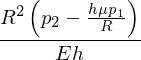

In [5]:
up=R**2/E/h*(p2+mu/R*sol0.args[0])
up

Vztahy pro $u$, $\vartheta$, $\mathcal{M}_{z}$, $\mathcal{M}_{t}$, $\mathcal{T}$ a $\mathcal{N}_{t}$ jsou pak následující

\begin{equation}
  \begin{split}
    u &= \mathrm{e}^{-\beta z}\left(C_{1}\sin\beta z+C_{2}\cos\beta z\right)+\frac{R^{2}}{Eh}\left(p_{2}+\nu p_{1}\frac{h}{R}\right), \\
    \vartheta &= -\beta\mathrm{e}^{-\beta z}\left[C_{1}\left(\sin\beta z-\cos\beta z\right)+C_{2}\left(\sin\beta z+\cos\beta z\right)\right], \\
    \mathcal{M}_{z} &= -2B\beta^{2}\mathrm{e}^{-\beta z}\left(-C_{1}\cos\beta z+C_{2}\sin\beta z\right), \\
    \mathcal{M}_{t} &= -2\nu B\beta^{2}\mathrm{e}^{-\beta z}\left(-C_{1}\cos\beta z+C_{2}\sin\beta z\right), \\
    \mathcal{T} &= 2B\beta^{3}\mathrm{e}^{-\beta z}\left[C_{1}\left(\sin\beta z+\cos\beta z\right)+C_{2}\left(-\sin\beta z+\cos\beta z\right)\right], \\
    \mathcal{N}_{t} &= Rp_{2}-4B\beta^{4}R\mathrm{e}^{-\beta z}\left(C_{1}\sin\beta z+C_{2}\cos\beta z\right).
  \end{split}
\end{equation}

Takže

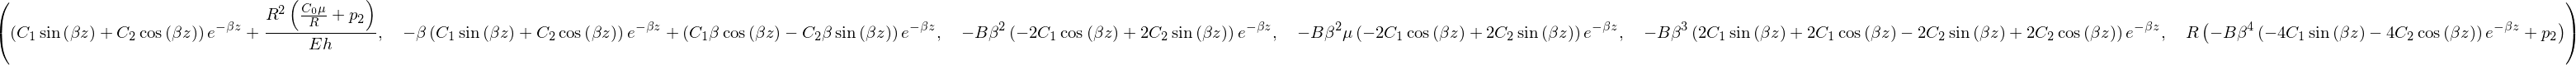

In [6]:
u=sp.exp(-beta*z)*(C1*sp.sin(beta*z)+C2*sp.cos(beta*z))+ \
  R**2/E/h*(p2+mu/R*C0)
t=u.diff(z)
Mz=-B*u.diff(z,2)
Mt=mu*Mz
T=-B*u.diff(z,3)
Nt=R*(p2-B*u.diff(z,4))
u,t,Mz,Mt,T,Nt

Konstanty $C_{1}$ a $C_{2}$ se určí z okrajových podmínek

\begin{equation}
  \begin{split}
    \mathcal{M}_{z} &= \mathcal{M}\quad\mathrm{pro}\:z=0, \\		
    \mathcal{T} &= -\mathcal{F}\quad\mathrm{pro}\:z=0.
  \end{split}
\end{equation}

Jejich řešení je následující.

In [7]:
benq1=Mz.subs(z,0)-M
benq2=T.subs(z,0)+F
benq1,benq2

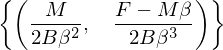

In [8]:
solb=sp.linsolve([benq1,benq2],[C1,C2])
solb

Na následujích obrázcích jsou zobrazeny rozložení posuvů $u$, natočení $\vartheta$, momentů $\mathcal{M}_{z}$ a $\mathcal{M}_{t}$, vnitřních sil $\mathcal{T}$ a $\mathcal{N}_{t}$ pro hodnoty

\begin{equation}
  \begin{split}
    R &= 100\,\mathrm{mm}, \\
    h &= 2\,\mathrm{mm}, \\
    E &= 2,1\times10^{5}\,\mathrm{MPa}, \\
    \nu &= 0.3, \\
    \mathcal{M} &= 1.0\times10^{4}\,\mathrm{N}, \\
    \mathcal{F} &= 100\,\mathrm{N}\times\mathrm{mm}^{-1}, \\
    p_{1} &= 20\,\mathrm{MPa,} \\
    p_{2} &= 30\,\mathrm{MPa}.
  \end{split}
\end{equation}

Dosazení konkrétních hodnot.

In [9]:
R_,h_=100.,2.
E_,mu_=2.1e5,0.3
M_,F_,p1_,p2_=1.0e4,1.0e2,20.,30.
B_=E_*h_**3/12./(1.-mu_)
beta_=(3.*(1.-mu_**2)/R_**2/h_**2)**(1./4.)
C0_=float(sol0.args[0].subs({h:h_,p1:p1_}))
C1_=float(solb.args[0][0].subs({M:M_,B:B_,beta:beta_}))
C2_=float(solb.args[0][1].subs({M:M_,F:F_,B:B_,beta:beta_}))
print('C0={:10.3e}\nC1={:10.3e}\nC2={:10.3e}'.format(C0_,C1_,C2_))

C0=-4.000e+01
C1= 3.026e+00
C2=-2.693e+00


Převedení $u$ na funkci a její projekci na válec.

In [10]:
u_=sp.lambdify((z,p2,R,h,E,mu,beta,C0,C1,C2),u)
def u3d(phi,z_,k):
  xl=(1.+
  k*u_(z_,p2_,R_,h_,E_,mu_,beta_,C0_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*u_(z_,p2_,R_,h_,E_,mu_,beta_,C0_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Převedení $\vartheta$ na funkci a její projekci na válec.

In [11]:
t_=sp.lambdify((z,beta,C1,C2),t)
def t3d(phi,z_,k):
  xl=(1.+k*t_(z_,beta_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*t_(z_,beta_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Převedení $\mathcal{M}_z$ na funkci a její projekci na válec.

In [12]:
Mz_=sp.lambdify((z,B,beta,C1,C2),Mz)
def Mz3d(phi,z_,k):
  xl=(1.+k*Mz_(z_,B_,beta_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*Mz_(z_,B_,beta_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Převedení $\mathcal{M}_t$ na funkci a její projekci na válec.

In [13]:
Mt_=sp.lambdify((z,mu,B,beta,C1,C2),Mt)
def Mt3d(phi,z_,k):
  xl=(1.+k*Mt_(z_,mu_,B_,beta_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*Mt_(z_,mu_,B_,beta_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Převedení $\mathcal{T}$ na funkci a její projekci na válec.

In [14]:
T_=sp.lambdify((z,B,beta,C1,C2),T)
def T3d(phi,z_,k):
  xl=(1.+k*T_(z_,B_,beta_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*T_(z_,B_,beta_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Převedení $\mathcal{N}_t$ na funkci a její projekci na válec.

In [15]:
Nt_=sp.lambdify((z,R,p2,B,beta,C1,C2),Nt)
def Nt3d(phi,z_,k):
  xl=(1.+k*Nt_(z_,R_,p2_,B_,beta_,C1_,C2_))*np.cos(phi)
  yl=z_
  zl=(1.+k*Nt_(z_,R_,p2_,B_,beta_,C1_,C2_))*np.sin(phi)
  return np.array([xl,yl,zl])

Vykrelsení posuvů $u$.

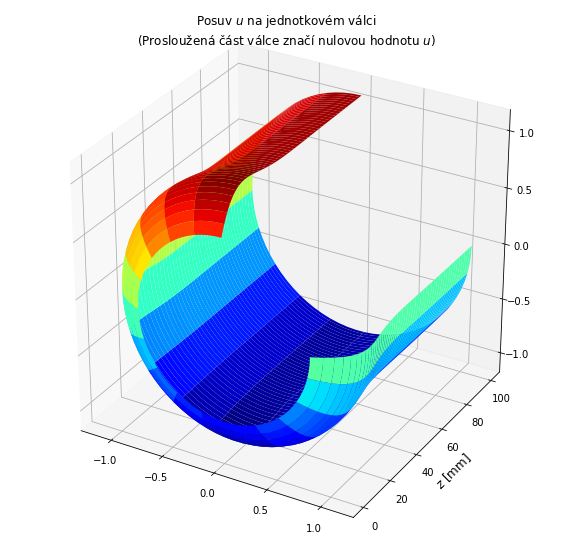

In [16]:
nu,nv=200,60
u=np.linspace(0,100,nu)
v=np.linspace(1./2.*np.pi,2.*np.pi,nv)
[u1,v1]=np.meshgrid(u,v)
x3d,y3d,z3d=np.zeros((nv,nu)),np.zeros((nv,nu)),np.zeros((nv,nu))
#vykresleni posuvu u
for ii in range(nv):
  for jj in range(nu):
    xyz=u3d(v1[ii,jj],u1[ii,jj],0.1)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title('Posuv $u$ na jednotkovém válci\n(Prosloužená část válce značí nulovou hodnotu $u$)').set_fontsize(12)
ax.set_ylabel(r'$z$ [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()

Vykreslení natočení $\vartheta$.

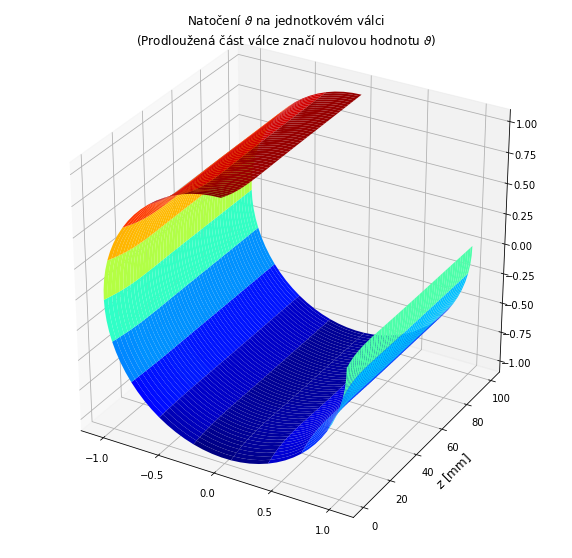

In [17]:
for ii in range(nv):
  for jj in range(nu):
    xyz=t3d(v1[ii,jj],u1[ii,jj],0.1)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title('Natočení $\\vartheta$ na jednotkovém válci\n(Prodloužená část válce značí nulovou hodnotu $\\vartheta$)') \
            .set_fontsize(12)
ax.set_ylabel(r'$z$'+' [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()

Vykreslení momentu $\mathcal{M}_z$.

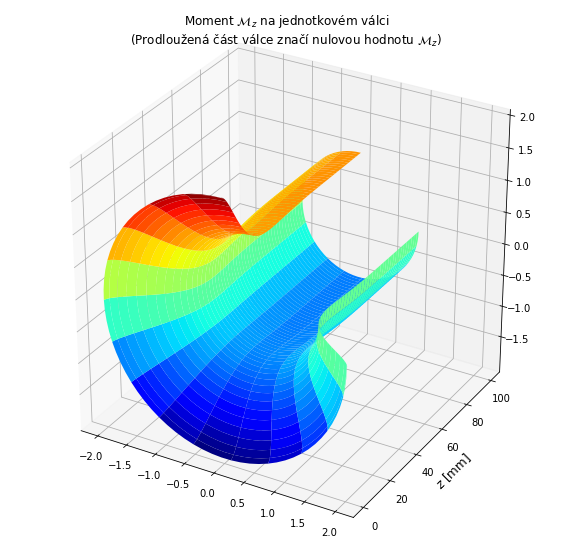

In [18]:
for ii in range(nv):
  for jj in range(nu):
    xyz=Mz3d(v1[ii,jj],u1[ii,jj],0.0001)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title( \
    'Moment $\\mathcal{M}_z$ na jednotkovém válci\n(Prodloužená část válce značí nulovou hodnotu $\\mathcal{M}_z$)') \
    .set_fontsize(12)
ax.set_ylabel(r'$z$ [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()

Vykreslení momentu $\mathcal{M}_t$.

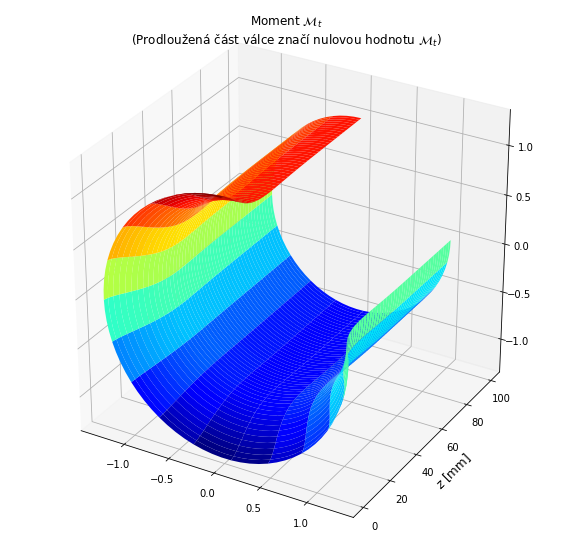

In [19]:
for ii in range(nv):
  for jj in range(nu):
    xyz=Mt3d(v1[ii,jj],u1[ii,jj],0.0001)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title('Moment $\\mathcal{M}_t$\n(Prodloužená část válce značí nulovou hodnotu $\\mathcal{M}_t$)').set_fontsize(12)
ax.set_ylabel(r'$z$ [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()

Vykrelsení posouvájící síly $\mathcal{T}$.

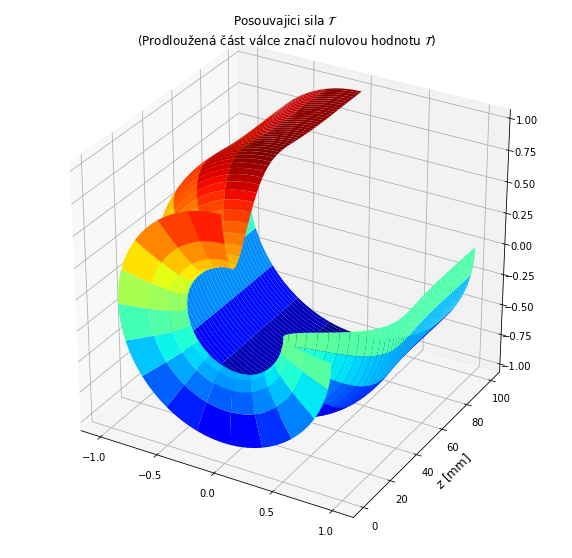

In [20]:
for ii in range(nv):
  for jj in range(nu):
    xyz=T3d(v1[ii,jj],u1[ii,jj],0.001)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title('Posouvajici sila $\\mathcal{T}$\n(Prodloužená část válce značí nulovou hodnotu $\\mathcal{T}$)') \
            .set_fontsize(12)
ax.set_ylabel(r'$z$'+' [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()

Vykrelsení normálové síly $\mathcal{N}_t$.

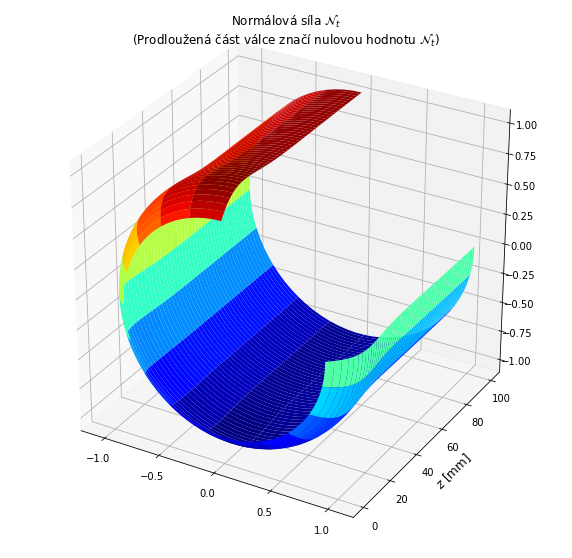

In [21]:
for ii in range(nv):
  for jj in range(nu):
    xyz=Nt3d(v1[ii,jj],u1[ii,jj],0.00001)
    x3d[ii,jj]=xyz[0]
    y3d[ii,jj]=xyz[1]
    z3d[ii,jj]=xyz[2]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_title('Normálová síla $\\mathcal{N}_t$\n(Prodloužená část válce značí nulovou hodnotu $\\mathcal{N}_t$)') \
            .set_fontsize(12)
ax.set_ylabel(r'$z$ [mm]').set_fontsize(12)
ax.plot_surface(x3d,y3d,z3d,rstride=4,cstride=4,cmap=cm.jet)
plt.show()